In [89]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
sys.path.append('..')
import Functions as f

In [90]:
data = pd.read_csv('../data/secret_polynomial.csv').to_numpy()
random_state = np.random.randint(1, 301)
# splitting the data into training and testing (80-20)
X_train, X_test, y_train, y_test = train_test_split(data[:, 0], data[:, 1], test_size=0.2, random_state=random_state)

- Plotting the training data.

Text(0.5, 1.0, 'Training data')

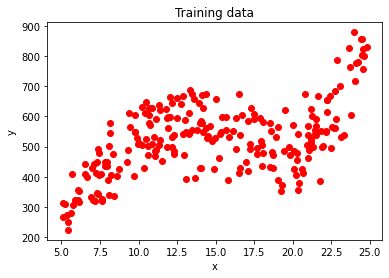

In [91]:
figure, axes = plt.subplots()
axes.scatter(X_train, y_train, color='red')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('Training data')

Extending the X_train matrix

In [92]:
Xe_train = np.c_[np.ones((X_train.shape[0],1)) , X_train, X_train**2, X_train**3, X_train**4, X_train**5, X_train**6]

In [93]:
beta_with_normal_eq = np.linalg.inv(Xe_train.T.dot(Xe_train)).dot(Xe_train.T).dot(y_train)
cost = f.cost_function(Xe_train, y_train, beta_with_normal_eq, len(y_train))
print(beta_with_normal_eq)
print(cost)

[-2.96037840e+02  2.16882011e+02 -3.78853736e+01  4.87624952e+00
 -3.43672350e-01  1.13508716e-02 -1.36611908e-04]
4989.546407232853


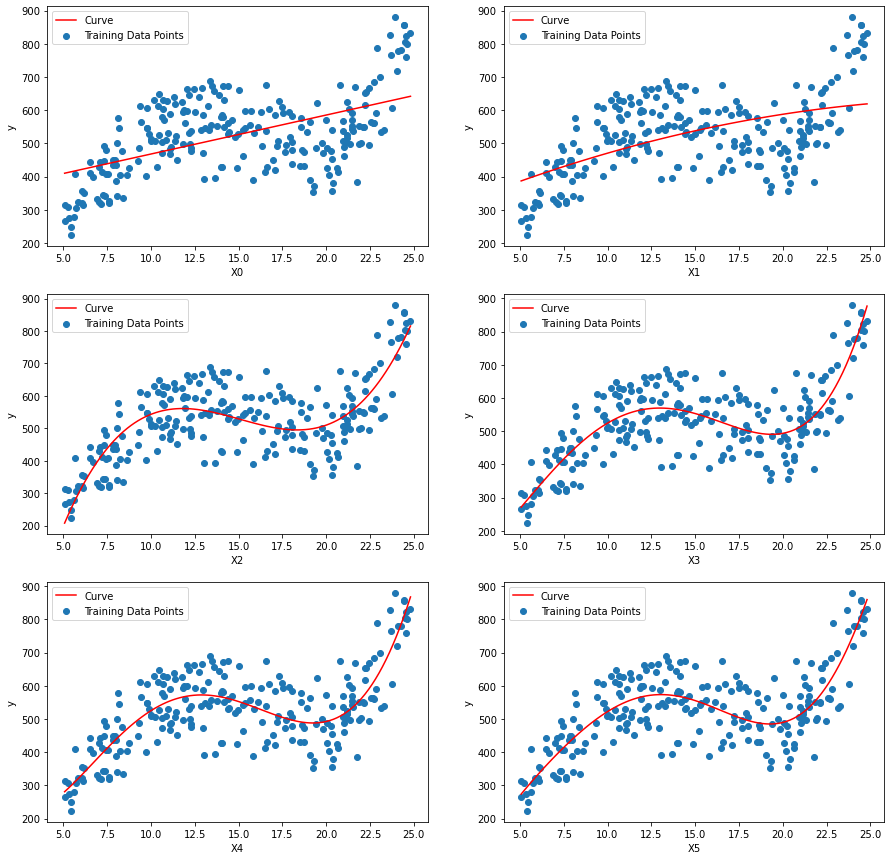

In [94]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
axes = [ax1, ax2, ax3, ax4, ax5, ax6]
X = np.c_[np.ones((X_train.shape[0],1)) , X_train]
#X = np.c_[X_train]
x_points = np.linspace(X_train.min(), X_train.max(), 100)
X_curve = np.c_[np.ones((x_points.shape[0], 1)), x_points]
#X_curve = np.c_[x_points]
for i in range(len(axes)):
    if i > 0:
        new_column = X_train**(i+1)
        new_column_curve = x_points**(i+1)
        X = np.c_[X, new_column]
        X_curve = np.c_[X_curve, new_column_curve]
    beta = f.normal_equation(X, y_train)
    y_curve = X_curve.dot(beta)
    axes[i].scatter(X_train, y_train, label='Training Data Points')
    axes[i].plot(x_points, y_curve, color='r', label='Curve')
    axes[i].set_xlabel('X' + str(i))
    axes[i].set_ylabel('y')
    axes[i].legend()